# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 604


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | college
Processing Record 3 of Set 1 | inarajan village
Processing Record 4 of Set 1 | kirensk
Processing Record 5 of Set 1 | cantley
Processing Record 6 of Set 1 | ekibastuz
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | udachny
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | codajas
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | idri
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | marica
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | balsas
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | badger
Processing Record 22 of Set 1 | mejit
Proce

Processing Record 41 of Set 4 | robertsport
Processing Record 42 of Set 4 | howrah
Processing Record 43 of Set 4 | erbil
Processing Record 44 of Set 4 | fort st. john
Processing Record 45 of Set 4 | yaren
Processing Record 46 of Set 4 | haiku-pauwela
Processing Record 47 of Set 4 | santiago del estero
Processing Record 48 of Set 4 | tan-tan
Processing Record 49 of Set 4 | khoyniki
Processing Record 0 of Set 5 | la ronge
Processing Record 1 of Set 5 | tidjikja
Processing Record 2 of Set 5 | nizhniy kuranakh
Processing Record 3 of Set 5 | nova venecia
Processing Record 4 of Set 5 | guane
Processing Record 5 of Set 5 | palmer
Processing Record 6 of Set 5 | happy valley-goose bay
Processing Record 7 of Set 5 | albertina
Processing Record 8 of Set 5 | espanola
Processing Record 9 of Set 5 | kailua-kona
Processing Record 10 of Set 5 | kochubey
Processing Record 11 of Set 5 | rio grande
Processing Record 12 of Set 5 | kapa'a
Processing Record 13 of Set 5 | arraial do cabo
Processing Record 14

Processing Record 28 of Set 8 | placido de castro
Processing Record 29 of Set 8 | alice town
Processing Record 30 of Set 8 | egersund
Processing Record 31 of Set 8 | praia da vitoria
Processing Record 32 of Set 8 | sitka
Processing Record 33 of Set 8 | shimokizukuri
Processing Record 34 of Set 8 | san ignacio de velasco
Processing Record 35 of Set 8 | san sebastian de la gomera
Processing Record 36 of Set 8 | kapuskasing
Processing Record 37 of Set 8 | hoi an
Processing Record 38 of Set 8 | ivdel'
Processing Record 39 of Set 8 | zyrya
Processing Record 40 of Set 8 | setti fatma
City not found. Skipping...
Processing Record 41 of Set 8 | grantsville
Processing Record 42 of Set 8 | biala podlaska
Processing Record 43 of Set 8 | ancud
Processing Record 44 of Set 8 | afaahiti
Processing Record 45 of Set 8 | mont-dore
Processing Record 46 of Set 8 | gobernador virasora
Processing Record 47 of Set 8 | quellon
Processing Record 48 of Set 8 | hasaki
Processing Record 49 of Set 8 | port saint j

Processing Record 16 of Set 12 | tarakan
Processing Record 17 of Set 12 | izberbash
Processing Record 18 of Set 12 | kargopol'
Processing Record 19 of Set 12 | aksu
Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | wakema
Processing Record 22 of Set 12 | dien bien phu
Processing Record 23 of Set 12 | ihosy
Processing Record 24 of Set 12 | dwarka
Processing Record 25 of Set 12 | ondjiva
Processing Record 26 of Set 12 | paragominas
Processing Record 27 of Set 12 | santa ana
Processing Record 28 of Set 12 | miranda
Processing Record 29 of Set 12 | box elder
Processing Record 30 of Set 12 | ciudad insurgentes
Processing Record 31 of Set 12 | puerto lempira
Processing Record 32 of Set 12 | nahiyat ash shinafiyah
Processing Record 33 of Set 12 | tamanrasset
Processing Record 34 of Set 12 | groningen
Processing Record 35 of Set 12 | aitape
Processing Record 36 of Set 12 | al-`ula
City not found. Skipping...
Processing Record 37 of Set 12 | awjilah
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns = ["City", 
                          "Lat", 
                          "Lng", 
                          "Max Temp",
                          "Humidity",
                          "Cloudiness",
                          "Wind Speed",
                          "Country",
                          "Date"])

city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,4.53,88,90,3.25,TF,1699950823
1,college,64.8569,-147.8028,-3.63,92,98,1.22,US,1699950824
2,inarajan village,13.2736,144.7484,29.08,89,81,9.48,GU,1699950825
3,kirensk,57.7853,108.1119,-0.02,83,100,5.81,RU,1699950826
4,cantley,53.5000,-1.0500,10.43,90,86,3.20,GB,1699950827


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.53,88,90,3.25,TF,1699950823
1,college,64.8569,-147.8028,-3.63,92,98,1.22,US,1699950824
2,inarajan village,13.2736,144.7484,29.08,89,81,9.48,GU,1699950825
3,kirensk,57.7853,108.1119,-0.02,83,100,5.81,RU,1699950826
4,cantley,53.5000,-1.0500,10.43,90,86,3.20,GB,1699950827


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

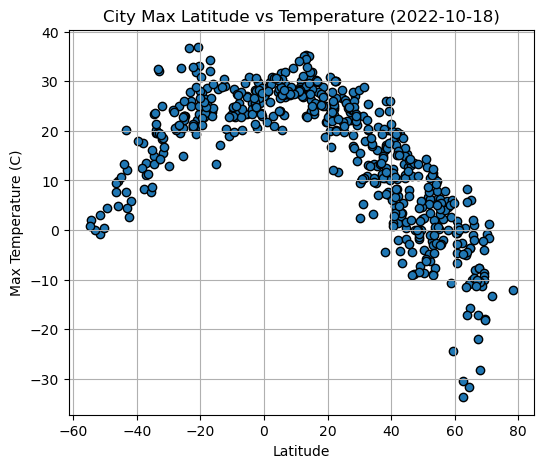

In [8]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

plt.figure(figsize=(6, 5))
plt.scatter(lat, temp, edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

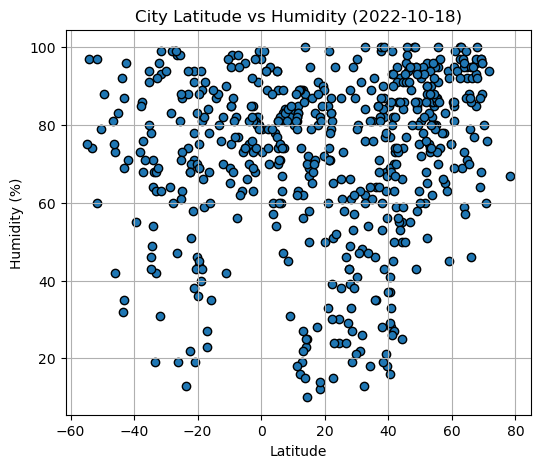

In [9]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

plt.figure(figsize=(6, 5))
plt.scatter(lat, humidity, edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2022-10-18)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

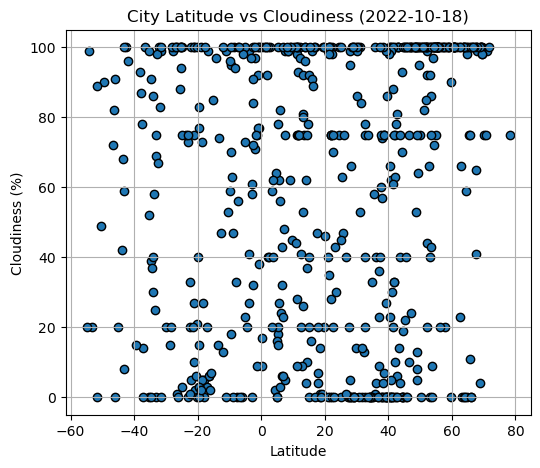

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]

plt.figure(figsize=(6, 5))
plt.scatter(lat, cloud, edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2022-10-18)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

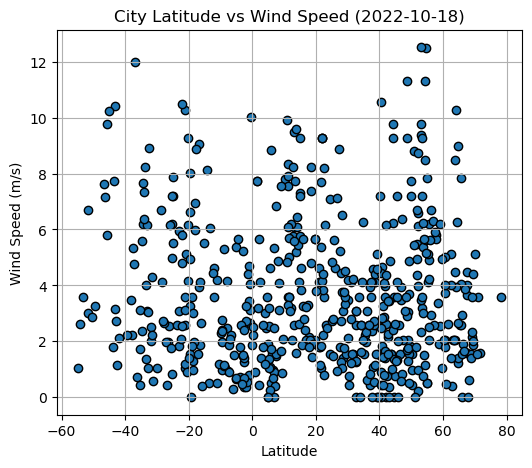

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]

plt.figure(figsize=(6, 5))
plt.scatter(lat, wind_speed, edgecolors="black")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.grid(visible=True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def weather_linregress(df, x_column, y_column, xlabel, ylabel):
    x = df[x_column]
    y = df[y_column]
    slope, intercept, rvalue, pvalue, stderr = linregress(x,y)
    lin_reg = x * slope + intercept
    plt.scatter(x, y, c="royalblue")
    plt.plot(x, lin_reg, color='red')
    lin_eq = f"y={round(slope,3)}x + {round(intercept,3)}"
    plt.annotate(lin_eq, (x.min(), y.min()), fontsize=13, color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{xlabel} vs. {ylabel}")
    print(f"The r-value is: {rvalue}")
    plt.show()
    return lin_eq

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,college,64.8569,-147.8028,-3.63,92,98,1.22,US,1699950824
2,inarajan village,13.2736,144.7484,29.08,89,81,9.48,GU,1699950825
3,kirensk,57.7853,108.1119,-0.02,83,100,5.81,RU,1699950826
4,cantley,53.5000,-1.0500,10.43,90,86,3.20,GB,1699950827
5,ekibastuz,51.6667,75.3667,6.74,60,100,5.47,KZ,1699950828


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,4.53,88,90,3.25,TF,1699950823
6,adamstown,-25.0660,-130.1015,22.90,87,100,7.89,PN,1699950829
9,bredasdorp,-34.5322,20.0403,23.45,46,39,7.67,ZA,1699950832
12,codajas,-3.8367,-62.0569,25.55,70,99,0.74,BR,1699950834
15,puerto ayora,-0.7393,-90.3518,23.08,99,77,3.13,EC,1699950683


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8749084976395946


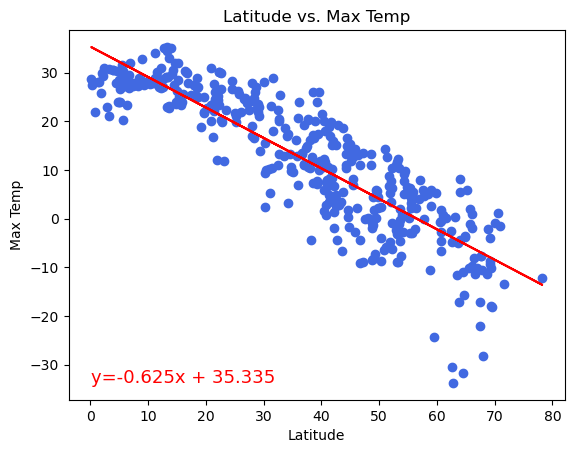

In [15]:
# Linear regression on Northern Hemisphere
plot_Temp_v_Lat_HH = weather_linregress(northern_hemi_df, 'Lat', 'Max Temp', 
                                        'Latitude', 'Max Temp')

The r-value is: 0.7251841270755943


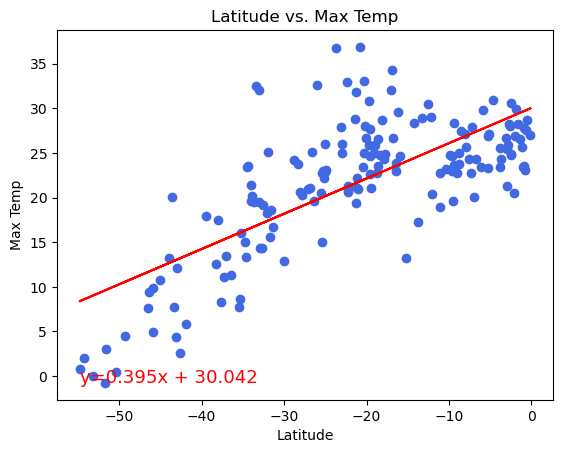

In [16]:
# Linear regression on Southern Hemisphere
plot_Temp_v_Lat_SH = weather_linregress(southern_hemi_df, 'Lat', 'Max Temp', 
                                        'Latitude', 'Max Temp')

**Discussion about the linear relationship:** In the northern hemisphere we can see a strong negative association between temperature and latitude. However in the southern hemisphere, we can see a semi-strong positive association. This data makes sense due to the shape of the earth and the equator having the warmest temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.248195831561002


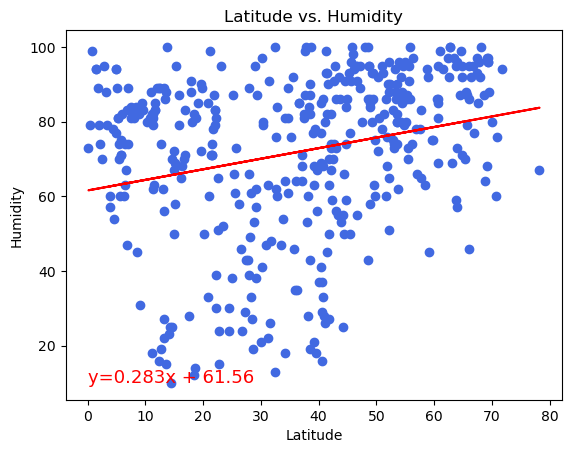

In [17]:
# Northern Hemisphere
plot_Temp_v_Lat_NH = weather_linregress(northern_hemi_df, 'Lat', 'Humidity', 
                                        'Latitude', 'Humidity')

The r-value is: 0.12035452520147946


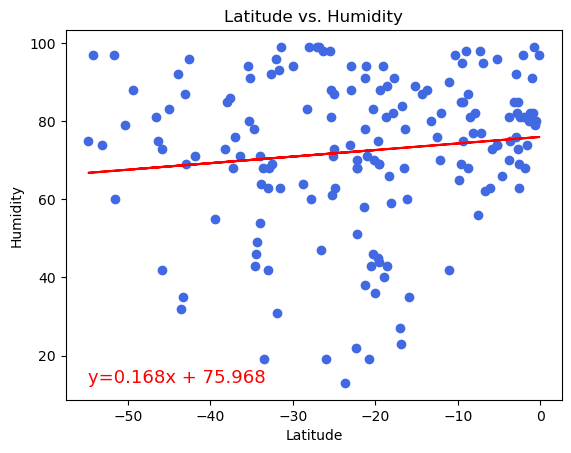

In [18]:
# Southern Hemisphere
plot_Temp_v_Lat_SH = weather_linregress(southern_hemi_df, 'Lat', 'Humidity', 
                                        'Latitude', 'Humidity')

**Discussion about the linear relationship:** In reference to humidity, both graphs show there is a weak and slightly positive correlation in relation to latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.21425976992121534


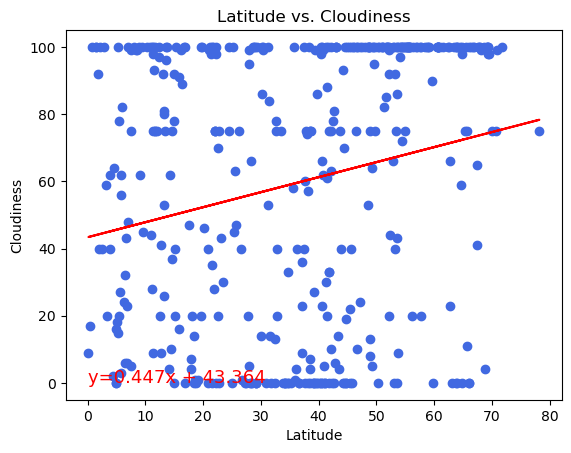

In [19]:
# Northern Hemisphere
plot_Cloud_v_Lat_NH = weather_linregress(northern_hemi_df, 'Lat', 'Cloudiness', 
                                        'Latitude', 'Cloudiness')

The r-value is: 0.05393670537496986


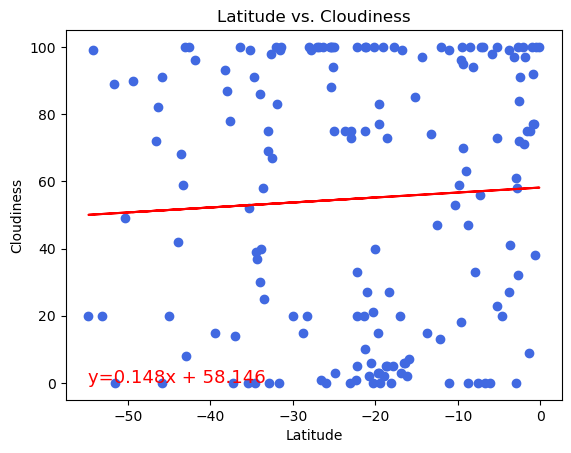

In [20]:
# Southern Hemisphere
plot_Cloud_v_Lat_SH = weather_linregress(southern_hemi_df, 'Lat', 'Cloudiness', 
                                        'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** Looking at both of the r-values for cloudiness, we see little to no correlation between latitude and cloud coverage. They are both slightly positive but extremely weak (close to 0). 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.024062307190974536


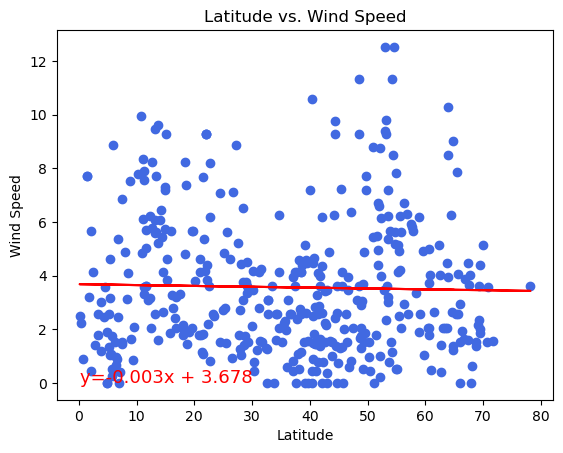

In [21]:
# Northern Hemisphere
plot_Wind_v_Lat_SH = weather_linregress(northern_hemi_df, 'Lat', 'Wind Speed', 
                                        'Latitude', 'Wind Speed')

The r-value is: -0.2747457906886454


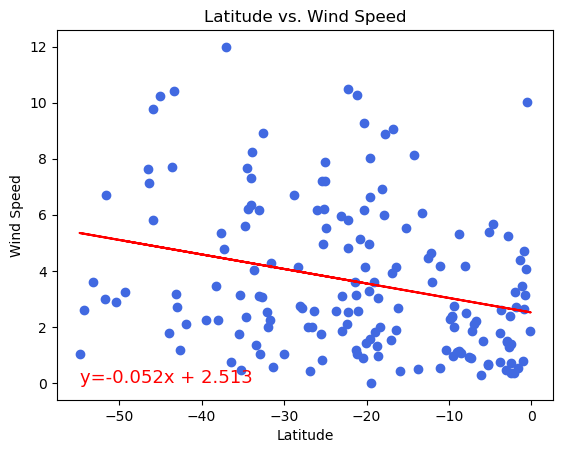

In [22]:
# Southern Hemisphere
plot_Wind_v_Lat_SH = weather_linregress(southern_hemi_df, 'Lat', 'Wind Speed', 
                                        'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** Finally in regard to wind speed, latitude also has little correlation in either the northern or southern hemispheres. We see a very weak negative in the southern hemisphere and almost no correlation in the northern one.  